In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/supermarket_sales - Sheet1.csv')


In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Age
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,19
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6,21
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,20
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,23
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,31


In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Age                        0
dtype: int64

In [6]:
age_bins=[0,18,25,35,45,55,float('inf')]
age_labels=['<18','18-25','26-35','36-45','46-55','56+']
df['AgeGroup']=pd.cut(df['Age'],bins=age_bins,labels=age_labels,right=False)
print(df[['Age','AgeGroup']])

     Age AgeGroup
0     19    18-25
1     21    18-25
2     20    18-25
3     23    18-25
4     31    26-35
..   ...      ...
995   65      56+
996   17      <18
997   31    26-35
998   24    18-25
999   97      56+

[1000 rows x 2 columns]


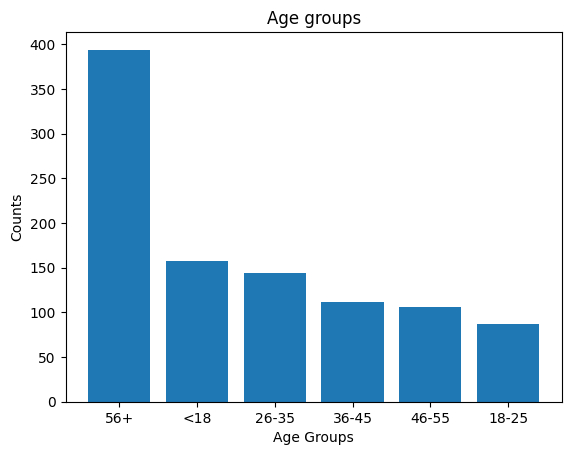

In [7]:
age_group_counts = df['AgeGroup'].value_counts()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title("Age groups")
plt.show()

In [8]:
covariance = np.cov(df['Age'], df['Rating'])

In [9]:
covariance

array([[7.39463864e+02, 2.62970971e-01],
       [2.62970971e-01, 2.95351823e+00]])

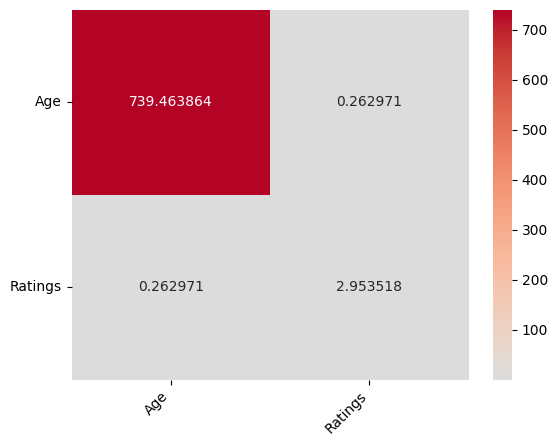

In [11]:
feature_names = ['Age', 'Ratings']
heatmap=sns.heatmap (covariance, annot=True , cmap ='coolwarm',fmt="2f" , center=0)
heatmap.set_xticklabels(feature_names, rotation=45, ha='right')
heatmap.set_yticklabels(feature_names, rotation=0)
plt.show()

In [12]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Product line'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Expected-value:",expected)

Chi-Square Statistic: 5.7444558595826445
P-value: 0.33188385805539106
Expected-value: [[85.17  89.178 87.174 76.152 80.16  83.166]
 [84.83  88.822 86.826 75.848 79.84  82.834]]


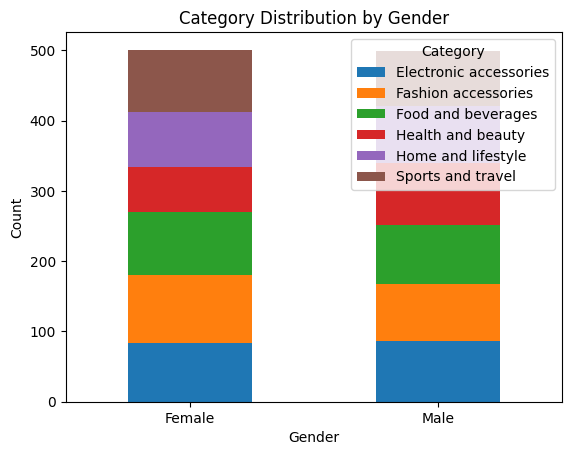

Chi-Square Statistic: 5.7444558595826445
p-value: 0.33188385805539106


In [13]:
contingency_table.plot(kind="bar", stacked=True)
plt.title("Category Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.show()

print("Chi-Square Statistic:",chi2_stat)
print("p-value:", p_val)

In [15]:
from scipy.stats import ttest_ind
male_data = df[df["Gender"] == "Male"]["Rating"]
female_data = df[df["Gender"] == "Female"]["Rating"]

# Perform independent t-test
t_statistic, p_value = ttest_ind(male_data, female_data)

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")

T-Statistic: 0.15164576973148555
p-value: 0.8794969800191749
Fail to reject null hypothesis: The means are not significantly different.


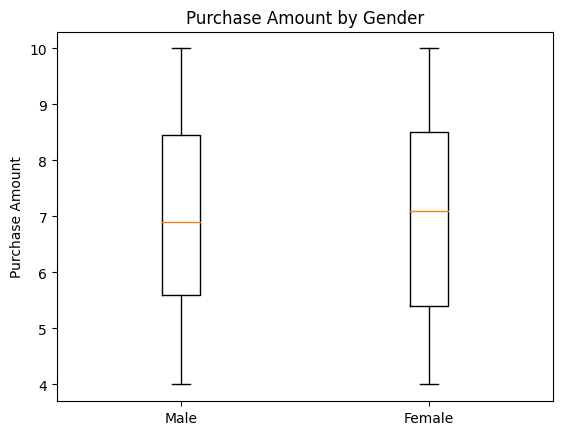

T-Statistic: 0.15164576973148555
p-value: 0.8794969800191749
Fail to reject null hypothesis: The means are not significantly different.


In [16]:
plt.boxplot([male_data, female_data], labels=["Male", "Female"])
plt.title("Purchase Amount by Gender")
plt.ylabel("Purchase Amount")
plt.show()

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")